# K-Means Clustering

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
# Example dataset (replace with your actual dataset loading code)
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Math Score': [90, 75, 60, 85, 95, 70, 55, 80, 85, 95],
    'English Score': [85, 80, 70, 90, 85, 75, 60, 95, 90, 80]
}

df = pd.DataFrame(data)

In [86]:
df

,Student,Math Score,English Score
0,A,90,85
1,B,75,80
2,C,60,70
3,D,85,90
4,E,95,85
5,F,70,75
6,G,55,60
7,H,80,95
8,I,85,90
9,J,95,80


In [87]:
# Selecting the features for clustering
X = df[['Math Score', 'English Score']]

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
X_scaled

array([[ 0.83390785,  0.40201513],
       [-0.30323922, -0.10050378],
       [-1.44038628, -1.1055416 ],
       [ 0.45485883,  0.90453403],
       [ 1.21295687,  0.40201513],
       [-0.68228824, -0.60302269],
       [-1.8194353 , -2.11057941],
       [ 0.0758098 ,  1.40705294],
       [ 0.45485883,  0.90453403],
       [ 1.21295687, -0.10050378]])

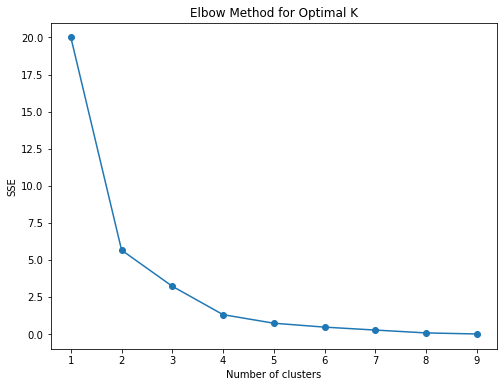

In [88]:
# Elbow method to find optimal K
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

In [89]:
# Choose K based on the elbow method (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the clustered data
print("Clustered Data:")
print(df)


Clustered Data:
  Student  Math Score  English Score  Cluster
0       A          90             85        1
1       B          75             80        2
2       C          60             70        0
3       D          85             90        1
4       E          95             85        1
5       F          70             75        2
6       G          55             60        0
7       H          80             95        1
8       I          85             90        1
9       J          95             80        1


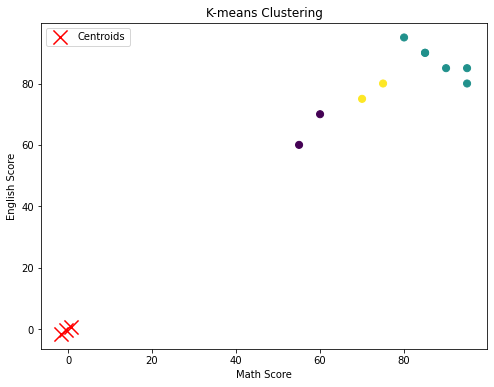

In [90]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Math Score'], df['English Score'], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.title('K-means Clustering')
plt.legend()
plt.show()

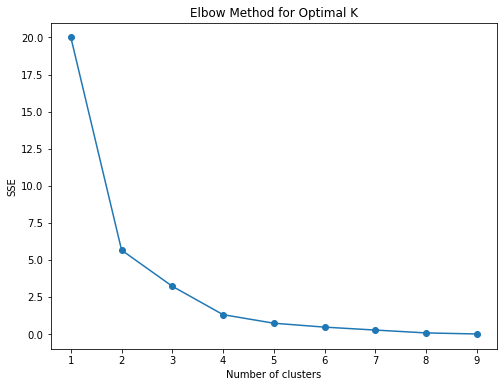

Clustered Data:
  Student  Math Score  English Score  Cluster
0       A          90             85        1
1       B          75             80        2
2       C          60             70        0
3       D          85             90        1
4       E          95             85        1
5       F          70             75        2
6       G          55             60        0
7       H          80             95        1
8       I          85             90        1
9       J          95             80        1


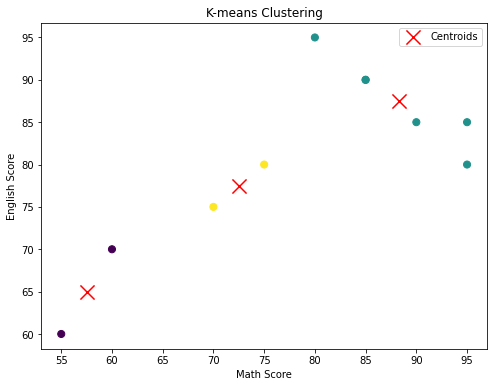

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Example dataset (replace with your actual dataset loading code)
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Math Score': [90, 75, 60, 85, 95, 70, 55, 80, 85, 95],
    'English Score': [85, 80, 70, 90, 85, 75, 60, 95, 90, 80]
}

df = pd.DataFrame(data)

# Selecting the features for clustering
X = df[['Math Score', 'English Score']]

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal K
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose K based on the elbow method (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Inverse transform the cluster centers to the original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Display the clustered data
print("Clustered Data:")
print(df)

# Plotting the clusters on real data
plt.figure(figsize=(8, 6))
plt.scatter(df['Math Score'], df['English Score'], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.title('K-means Clustering')
plt.legend()
plt.show()


# K-Means++ and K-Medoid

In [34]:
!pip install scikit-learn-extra

     |████████████████████████████████| 392 kB 1.3 MB/s eta 0:00:01


In [91]:
from sklearn_extra.cluster import KMedoids

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Example dataset (replace with your actual dataset loading code)
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Math Score': [90, 75, 60, 85, 95, 70, 55, 80, 85, 95],
    'English Score': [85, 80, 70, 90, 85, 75, 60, 95, 90, 80]
}

df = pd.DataFrame(data)

In [93]:
# Selecting the features for clustering
X = df[['Math Score', 'English Score']]

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [94]:
# K-means++ with optimal K (e.g., K=3)
kmeans_pp = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans_pp.fit(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster_KMeans++'] = kmeans_pp.labels_

K-means++ Clustered Data:


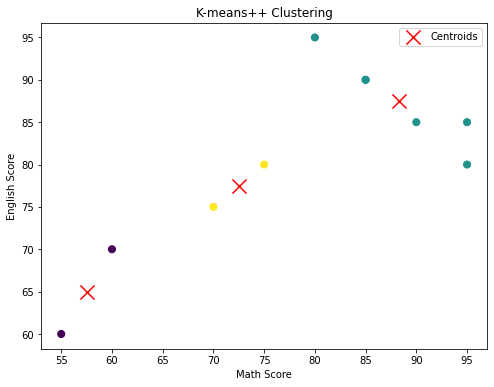

In [95]:
# Display the clustered data
print("K-means++ Clustered Data:")
df

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Math Score'], df['English Score'], c=df['Cluster_KMeans++'], cmap='viridis', s=50)
centroids = scaler.inverse_transform(kmeans_pp.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.title('K-means++ Clustering')
plt.legend()
plt.show()


## K-Medoid

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids

# Example dataset (replace with your actual dataset loading code)
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Math Score': [90, 75, 60, 85, 95, 70, 55, 80, 85, 95],
    'English Score': [85, 80, 70, 90, 85, 75, 60, 95, 90, 80]
}

df = pd.DataFrame(data)
df

,Student,Math Score,English Score
0,A,90,85
1,B,75,80
2,C,60,70
3,D,85,90
4,E,95,85
5,F,70,75
6,G,55,60
7,H,80,95
8,I,85,90
9,J,95,80


In [97]:
# Selecting the features for clustering
X = df[['Math Score', 'English Score']]

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-medoids with optimal K (e.g., K=3)
kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids.fit(X_scaled)

KMedoids(n_clusters=3, random_state=0)

K-medoids Clustered Data:


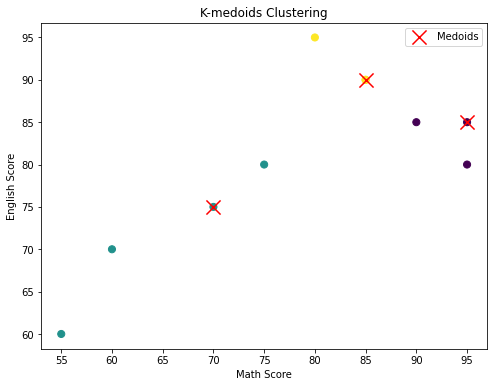

In [98]:
# Add cluster labels to the original DataFrame
df['Cluster_KMedoids'] = kmedoids.labels_

# Display the clustered data
print("K-medoids Clustered Data:")
df

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Math Score'], df['English Score'], c=df['Cluster_KMedoids'], cmap='viridis', s=50)
medoid_indices = kmedoids.medoid_indices_
medoids = X.iloc[medoid_indices]
plt.scatter(medoids['Math Score'], medoids['English Score'], marker='x', s=200, c='red', label='Medoids')
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.title('K-medoids Clustering')
plt.legend()
plt.show()


# Hierarchical Clustering

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Example dataset (replace with your actual dataset loading code)
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Math Score': [90, 75, 60, 85, 95, 70, 55, 80, 85, 95],
    'English Score': [85, 80, 70, 90, 85, 75, 60, 95, 90, 80]
}

df = pd.DataFrame(data)
df

,Student,Math Score,English Score
0,A,90,85
1,B,75,80
2,C,60,70
3,D,85,90
4,E,95,85
5,F,70,75
6,G,55,60
7,H,80,95
8,I,85,90
9,J,95,80


In [100]:
# Selecting the features for clustering
X = df[['Math Score', 'English Score']]

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')


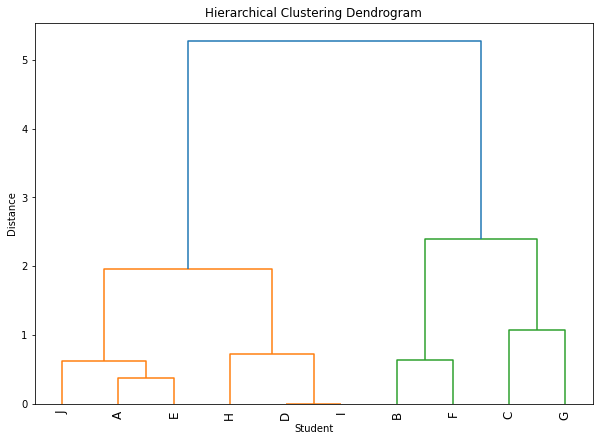

Hierarchical Clustering Clustered Data:


,Student,Math Score,English Score,Cluster_Hierarchical
0,A,90,85,1
1,B,75,80,1
2,C,60,70,1
3,D,85,90,1
4,E,95,85,1
5,F,70,75,1
6,G,55,60,1
7,H,80,95,1
8,I,85,90,1
9,J,95,80,1


In [101]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df['Student'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Student')
plt.ylabel('Distance')
plt.show()

# Extract clusters (e.g., specifying a distance threshold or number of clusters)
max_d = 7.0  # You can change this value based on the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the original DataFrame
df['Cluster_Hierarchical'] = clusters

# Display the clustered data
print("Hierarchical Clustering Clustered Data:")
df

# DBSCAN Clustering

In [102]:
from sklearn.cluster import DBSCAN

In [103]:
# Example dataset (replace with your actual dataset loading code)
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Math Score': [90, 75, 60, 85, 95, 70, 55, 80, 85, 95],
    'English Score': [85, 80, 70, 90, 85, 75, 60, 95, 90, 80]
}

df = pd.DataFrame(data)
df

,Student,Math Score,English Score
0,A,90,85
1,B,75,80
2,C,60,70
3,D,85,90
4,E,95,85
5,F,70,75
6,G,55,60
7,H,80,95
8,I,85,90
9,J,95,80


In [104]:
# Selecting the features for clustering
X = df[['Math Score', 'English Score']]

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
# Perform DBSCAN clustering
epsilon = 0.5  # Maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 2  # Minimum number of samples in a neighborhood for a point to be considered as a core point

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster_DBSCAN'] = dbscan.labels_

# Display the clustered data
print("DBSCAN Clustered Data:")
df

DBSCAN Clustered Data:


,Student,Math Score,English Score,Cluster_DBSCAN
0,A,90,85,0
1,B,75,80,-1
2,C,60,70,-1
3,D,85,90,1
4,E,95,85,0
5,F,70,75,-1
6,G,55,60,-1
7,H,80,95,-1
8,I,85,90,1
9,J,95,80,-1


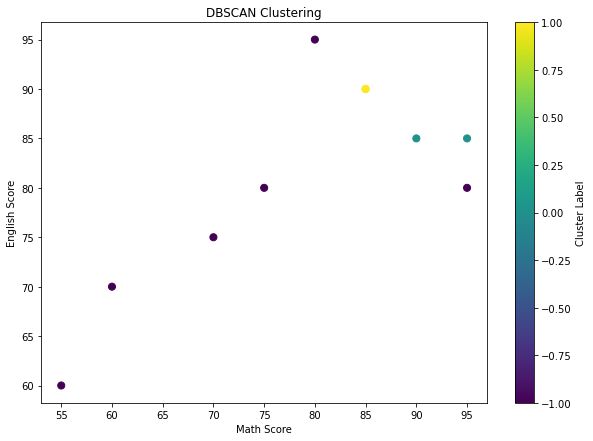

In [106]:
# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['Math Score'], df['English Score'], c=df['Cluster_DBSCAN'], cmap='viridis', s=50)
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


# Silhouette Analysis

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


In [108]:
# Example dataset (replace with your actual dataset loading code)
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Math Score': [90, 75, 60, 85, 95, 70, 55, 80, 85, 95],
    'English Score': [85, 80, 70, 90, 85, 75, 60, 95, 90, 80]
}

df = pd.DataFrame(data)
df

,Student,Math Score,English Score
0,A,90,85
1,B,75,80
2,C,60,70
3,D,85,90
4,E,95,85
5,F,70,75
6,G,55,60
7,H,80,95
8,I,85,90
9,J,95,80


In [109]:
# Selecting the features for clustering
X = df[['Math Score', 'English Score']]

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [118]:
# Perform K-means clustering with optimal K (e.g., K=3)
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster_KMeans'] = cluster_labels


Average Silhouette Score: 0.5533533508519295


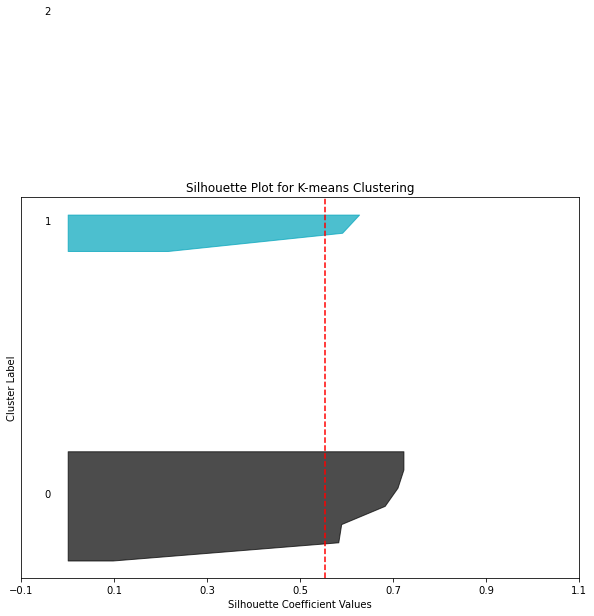

In [119]:
# Compute the silhouette scores for each sample
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

print("Average Silhouette Score:", silhouette_avg)

# Plotting the silhouette analysis
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title("Silhouette Plot for K-means Clustering")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster Label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()
